# Outlier Detection and Removal Using IQR

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("E:/dataset/height.csv")
df

,No,Name,Height
0,1,mania,4.37
1,2,sadia,1.92
2,3,rafia,5.87
3,4,saba,1.26
4,5,raba,34.30
5,6,naisa,3.88
6,7,niha,1.89
7,8,mila,3.78
8,9,shila,5.41
9,10,sumaiya,2.52


In [5]:
df.describe()

,No,Height
count,19.000000,19.000000
mean,10.000000,6.223684
std,5.627314,8.201726
min,1.000000,1.230000
25%,5.500000,1.905000
50%,10.000000,3.780000
75%,14.500000,5.175000
max,19.000000,34.300000


<Axes: xlabel='Height', ylabel='Density'>

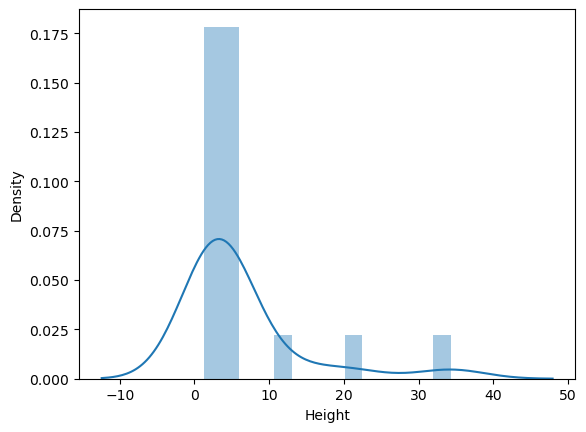

In [6]:
sns.distplot(df['Height'])

# Finding IQR

In [7]:
Q1 = df['Height'].quantile(0.25) #The Interquartile Range (IQR) is a measure of statistical 
Q3 = df.Height.quantile(0.75)   #dispersion that indicates the spread of the middle 50% of
Q1,Q3                           #a dataset. It is calculated as the difference between the
                                #third quartile (Q3) and the first quartile (Q1) of the data.

(1.9049999999999998, 5.175000000000001)

In [8]:
IQR = Q3 - Q1
IQR

3.270000000000001

In [9]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

lower_limit,upper_limit

(-3.0000000000000013, 10.080000000000002)

# Here the outliers

In [10]:
out= df[(df.Height<lower_limit)|(df.Height>upper_limit)]
out

,No,Name,Height
4,5,raba,34.30
15,16,rulina,20.45
17,18,barisha,12.44


# Remove Outliers

In [11]:
df_no_outlier = df[(df.Height>=lower_limit)&(df.Height<=upper_limit)]
df_no_outlier

,No,Name,Height
0,1,mania,4.37
1,2,sadia,1.92
2,3,rafia,5.87
3,4,saba,1.26
5,6,naisa,3.88
6,7,niha,1.89
7,8,mila,3.78
8,9,shila,5.41
9,10,sumaiya,2.52
10,11,rania,1.23


<Axes: xlabel='Height', ylabel='Density'>

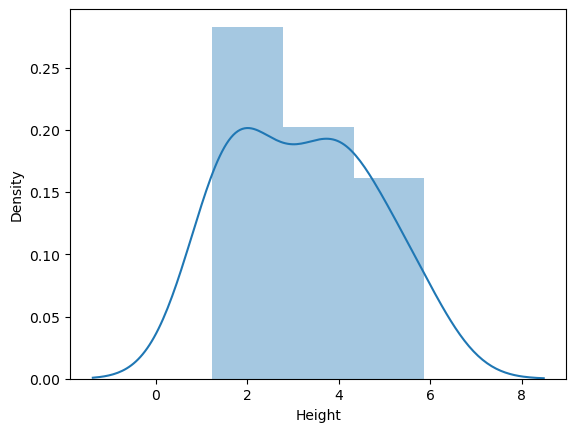

In [12]:
sns.distplot(df_no_outlier['Height'])

<Axes: >

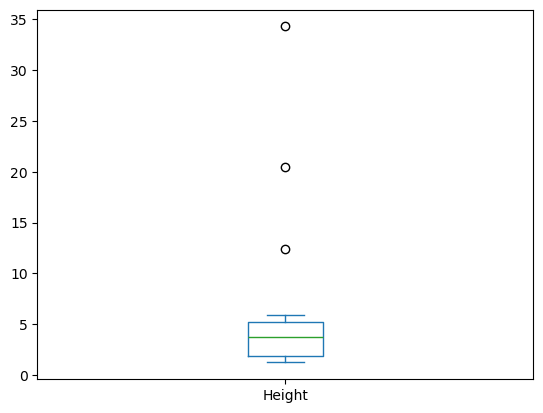

In [13]:
df['Height'].plot.box()

# Outlier detection and removal using z-score and standard deviation in python pandas 

In [14]:
import matplotlib 
from matplotlib import pyplot as plt

In [16]:
df=pd.read_csv('E:/dataset/heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


<Axes: >

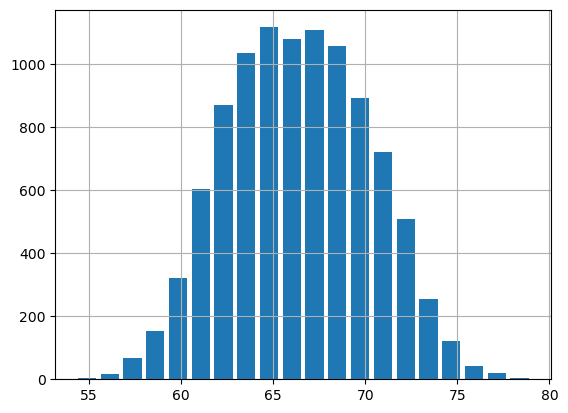

In [17]:
df.height.hist(bins=20, rwidth=0.8)

In [19]:
df.height.mean()

66.367559754866

In [20]:
df.height.std()

3.847528120795573

# Outlier detection and removal using 3 standaed deviation

one of the ways we can remove outliers is remove outlieris removed any data points that are beyond 3 standard deviation from mean .which means we can come up with following upper and lower bounds

In [22]:
upper_limit=df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [23]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

Here are the outliers that are beyond 3 std dev from mean

In [24]:
df[(df.height>upper_limit)|(df.height<lower_limit)] #select * from df where height<= upper_limit 
                                                    # and height >= lower_limit

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Now to remove the outliers and generate new dataframe

In [26]:
df_no_outlier_std_dev = df[(df.height<=upper_limit) & (df.height>= lower_limit)]
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [27]:
df_no_outlier_std_dev.shape

(9993, 2)

In [28]:
df.shape

(10000, 2)

# outlier detection and removal using z-score
Z score is a way to achieve same thing that we did above in part(1)
z score indicates how many standard deviation away a data point in.
for example in our case mean is 66.37 and standard deviation is 3.84

z= (x-mean)/standard deviation

In [31]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [33]:
df[df['zscore']>3] # when zscore in above 3 it is an outlier

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [34]:
df[df['zscore']<-3] # when zscore in less then -3 it is an outlier

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [35]:
df[(df.zscore<-3)|(df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
